# Effect of viscous liquid loading on Love wave propagation

## Kielczynski 2012

In [15]:
from math import *
from numpy import *
from scipy.optimize import *

In [16]:
import matplotlib.pyplot as plt

Data

In [17]:
#Frequency
frequency = 5e6 #Hz
omega = 2 * pi * frequency

#Materials
#Cu
mu_layer = 3.91e10 #N/m^2
rho_layer = 8.9e3 #kg/m^3
v_layer = sqrt(mu_layer/rho_layer) #m/s
h_layer = 0.4e-3 #m
k_layer = omega / v_layer

#Steel
mu_substrate = 8.02e10 #N/m^2
rho_substrate = 7.8e3 #kg/m^3
v_substrate = sqrt(mu_substrate/rho_substrate) #m/s
k_substrate = omega / v_substrate

#Liquid
rho_l = 1e3 #kg/m^3
Eta = array([0.1, 10, 20, 50, 70, 100]) #Pa.s
Vphase = []
Alpha = []
kinit = 14260
#kinit = 2383.60595872
alphainit = 0.1

In [18]:
def disp_kiel(z):
    k0 = z[0]
    alpha = z[1]
    F = empty(2)
    c = sqrt(k_layer**2 - k0**2 + alpha**2)
    d = - k0 * alpha / c
    e = sqrt(k0**2 - alpha**2 - k_substrate**2)
    f = k0 * alpha / e
    a1 = (k0**2 - alpha**2) / (2 * sqrt(2) * sqrt(omega * rho_l / eta - 2 * k0 * alpha)) + sqrt(omega * rho_l / eta - 2 * k0 * alpha) / sqrt(2)
    b1 = (k0**2 - alpha**2) / (2 * sqrt(2) * sqrt(omega * rho_l / eta - 2 * k0 * alpha)) - sqrt(omega * rho_l / eta - 2 * k0 * alpha) / sqrt(2)

    y1 = sin(c * h_layer) * cosh(d * h_layer)
    y2 = cos(c * h_layer) * sinh(d * h_layer)
    y3 = mu_layer**2 * (c**2 - d**2) - omega * eta * mu_substrate * (f * a1 +e *b1)
    y4 = mu_layer**2 * 2 * c * d - omega * eta * mu_substrate * (e * a1 - f * b1)
    y5 = cos(c * h_layer) * cosh(d * h_layer)
    y6 = sin(c * h_layer) * sinh(d * h_layer)
    y7 = mu_layer * mu_substrate * (e * c - f * d) - omega * eta * mu_layer * (b1 * c - d * a1)
    y8 = mu_layer * mu_substrate * (f * c + d * e) - omega * eta * mu_layer * (a1 * c - b1 * d)

    F[0] = (y1 * y3 - y2 * y4) - (y5 * y7 + y6 * y8)
    F[1] = (y1 * y4 - y2 * y3) - (y5 * y8 + y6 * y7)
    return F

In [19]:
for i in range(Eta.shape[0]):
    eta =  Eta[i]
    zinit = array([kinit, alphainit])
    z = root(disp_kiel, zinit, method= 'hybr')
    Vphase.append(2 * pi * frequency / z.x[0])
    Alpha.append(-z.x[1])
    kinit = z.x[0]
    alphainit = -z.x[1]

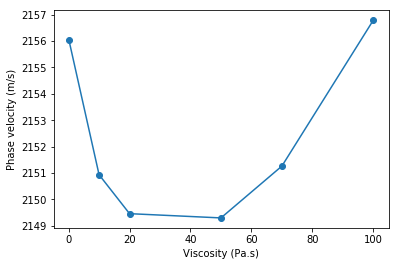

In [20]:
plt.plot(Eta, Vphase,'o-')

plt.xlabel('Viscosity (Pa.s)')
plt.ylabel('Phase velocity (m/s)')
plt.show()


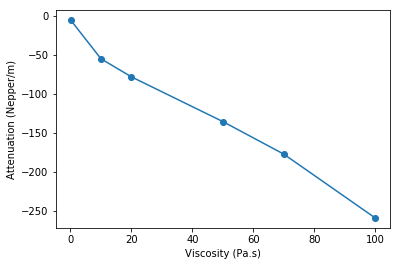

In [21]:
plt.plot(Eta, Alpha,'o-')

plt.xlabel('Viscosity (Pa.s)')
plt.ylabel('Attenuation (Nepper/m)')
plt.show()